Text(0.5, 1.0, 'Прогноз температуры за период     04-04-2025 00:00:00 - 05-04-2025 23:00:00')

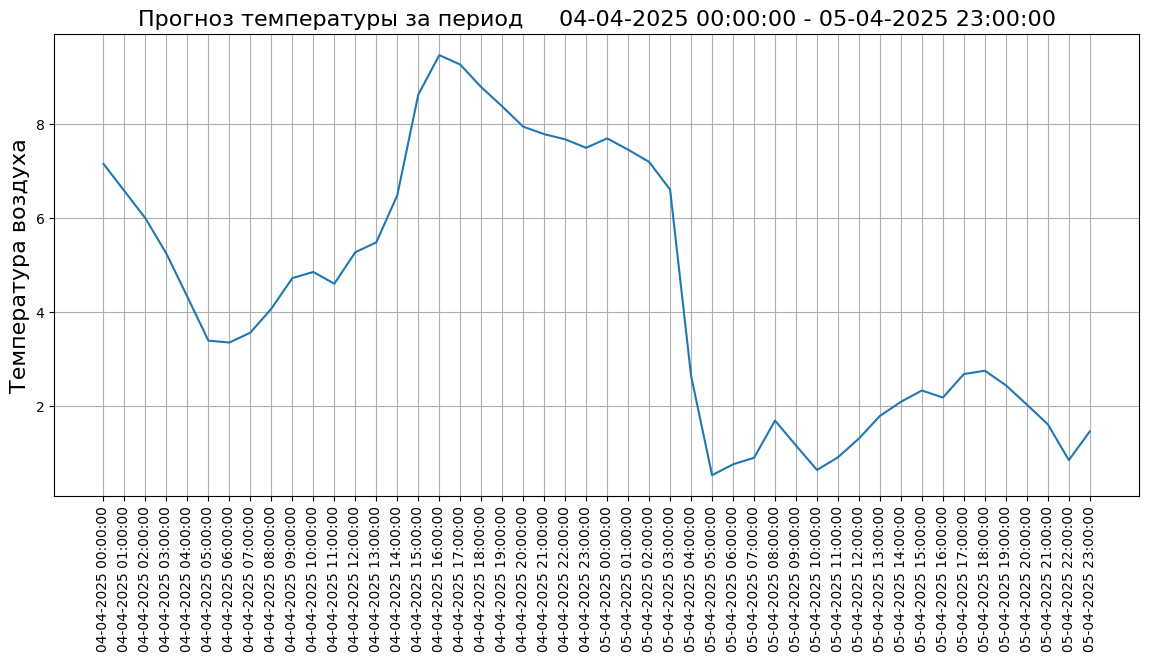

In [4]:
# С ПРОГНОЗОМ
import requests 
import pandas as pd 
import json
from datetime import datetime
from internal_data import weather_api
import seaborn as sns
import matplotlib.pyplot as plt


# Tomsk city center:
lat = '56.48'
lon = '84.98'

# Sabetta plant area
# lat = '71.26'
# lon = '72.05'

url = f'https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&units={'metric'}&appid={weather_api}'

response = requests.get(url)

data = response.json()



forecast_df = pd.DataFrame(data['hourly'])

feats_to_convert = ['dt']


def ts_convert(ts):
    return datetime.fromtimestamp(ts).strftime('%d-%m-%Y %H:%M:%S')

for feat in feats_to_convert:
    forecast_df[feat] = forecast_df[feat].apply(ts_convert)
    

def description_extract(data):

    result = f'{data[0]['main']} : {data[0]['description']}'

    return result
    
forecast_df['info'] = forecast_df['weather'].apply(description_extract)

forecast_df = forecast_df.drop('weather', axis=1)



fig = plt.figure(figsize=(14,6))

line_graph = sns.lineplot(
    data = forecast_df, 
    x = 'dt',
    y = 'temp'
    )

line_graph.grid()

line_graph.set_ylabel('Температура воздуха', fontsize = 16)
line_graph.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)

line_title_name = f'Прогноз температуры за период \
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

line_graph.set_title(line_title_name, fontsize = 16)

In [ ]:
forecast_df.head(15)

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,pop,rain,snow,info
0,20-03-2025 10:00:00,5.24,1.73,1015,63,-1.08,0.62,20,10000,4.81,206,13.92,0.0,NaN,NaN,Clouds : few clouds
1,20-03-2025 11:00:00,5.74,2.25,1015,59,-1.45,1.13,0,10000,5.02,204,13.72,0.0,NaN,NaN,Clear : clear sky
2,20-03-2025 12:00:00,5.61,1.99,1015,62,-0.96,1.43,20,10000,5.25,203,13.66,0.0,NaN,NaN,Clouds : few clouds
3,20-03-2025 13:00:00,5.78,2.08,1014,65,-0.25,1.69,40,10000,5.53,204,14.23,0.0,NaN,NaN,Clouds : scattered clouds
4,20-03-2025 14:00:00,6.33,2.92,1014,67,0.66,1.60,57,10000,5.18,212,13.86,0.0,NaN,NaN,Clouds : broken clouds
5,20-03-2025 15:00:00,6.69,3.39,1013,69,1.41,1.27,78,10000,5.14,211,13.79,0.0,NaN,NaN,Clouds : broken clouds
6,20-03-2025 16:00:00,6.85,3.53,1012,71,1.84,0.97,98,10000,5.29,209,13.62,0.0,NaN,NaN,Clouds : overcast clouds
7,20-03-2025 17:00:00,6.39,3.08,1012,72,1.74,0.54,99,10000,4.99,212,13.02,0.0,NaN,NaN,Clouds : overcast clouds
8,20-03-2025 18:00:00,5.54,2.06,1012,75,1.29,0.20,99,10000,4.90,205,12.39,0.0,NaN,NaN,Clouds : overcast clouds
9,20-03-2025 19:00:00,4.48,0.88,1012,77,0.70,0.00,99,10000,4.61,205,12.22,0.0,NaN,NaN,Clouds : overcast clouds


C:\Users\Юрий\AppData\Local\Temp\ipykernel_6492\2396115825.py:22: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([hist_gust, hist_wind], ['Порывы ветра', 'Скорость ветра'])


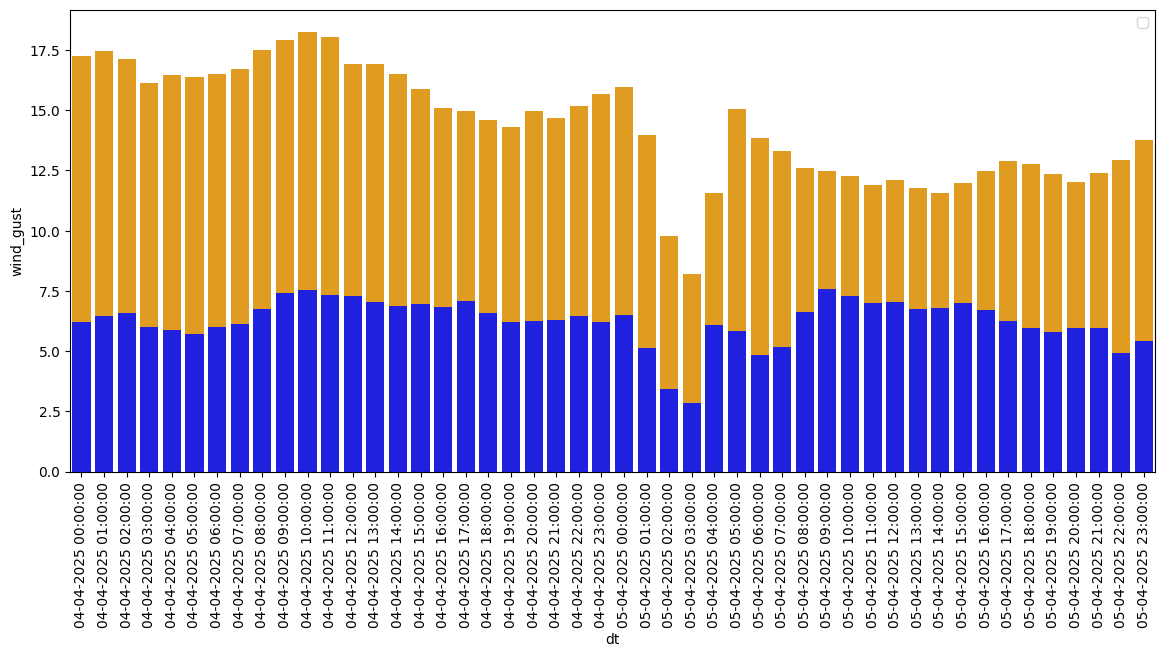

In [5]:
fig = plt.subplots(figsize = (14,6))



hist_gust = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='wind_gust',
    color='orange'
)

hist_wind = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='wind_speed',
    color='blue'
)


plt.tick_params(axis='x', labelrotation = 90)

plt.legend([hist_gust, hist_wind], ['Порывы ветра', 'Скорость ветра'])


In [7]:
forecast_df

feats_to_convert = ['dt']


def ts_convert(ts):
    return datetime.fromtimestamp(ts).strftime('%d-%m-%Y %H:%M:%S')

for feat in feats_to_convert:
    forecast_df[feat] = forecast_df[feat].apply(ts_convert)

TypeError: 'str' object cannot be interpreted as an integer

In [8]:
def description_extract(data):

    result = f'{data[0]['main']} : {data[0]['description']}'

    return result
    
forecast_df['info'] = forecast_df['weather'].apply(description_extract)

forecast_df = forecast_df.drop('weather', axis=1)

forecast_df.head(2)

KeyError: 'weather'

Text(0.5, 1.0, 'Прогноз температуры за период     04-04-2025 00:00:00 - 05-04-2025 23:00:00')

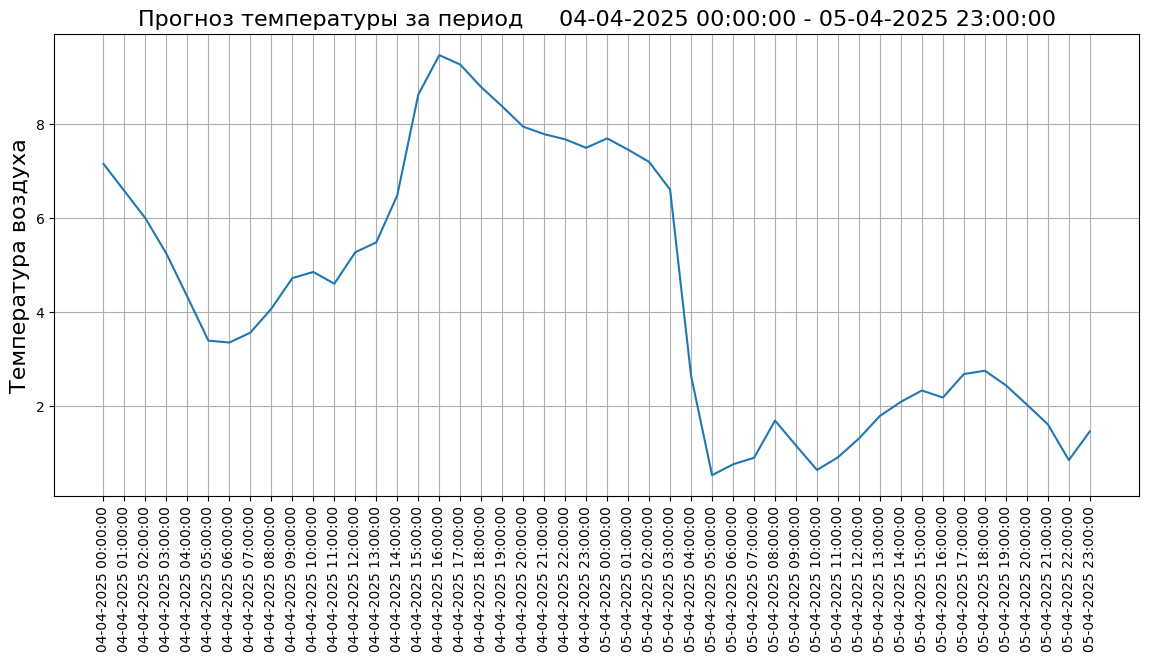

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(14,6))

line_graph = sns.lineplot(
    data = forecast_df, 
    x = 'dt',
    y = 'temp'
    )

line_graph.grid()

line_graph.set_ylabel('Температура воздуха', fontsize = 16)
line_graph.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)

line_title_name = f'Прогноз температуры за период \
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

line_graph.set_title(line_title_name, fontsize = 16)


In [10]:
forecast_df = forecast_df.fillna(0)

forecast_df['snow'] = forecast_df['snow'].apply(
    lambda x: x['1h'] if type(x) is dict else x
    )

forecast_df['rain'] = forecast_df['rain'].apply(
    lambda x: x['1h'] if type(x) is dict else x
    )

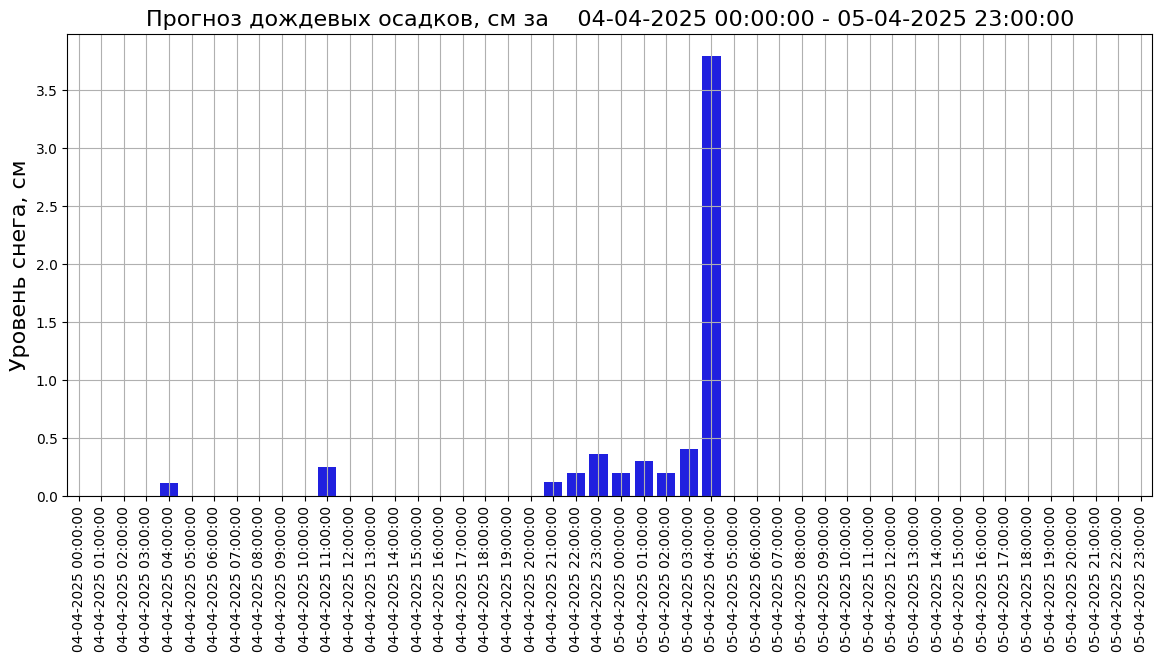

In [11]:
fig = plt.subplots(figsize = (14,6))

hist_rain = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='rain',
    color='blue'
)

hist_rain.set_ylabel('Уровень снега, см', fontsize = 16)
hist_rain.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)
plt.grid()

hist_rain_title_name = f'Прогноз дождевых осадков, см за\
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

hist_rain.set_title(hist_rain_title_name, fontsize = 16)

plt.show(hist_rain)

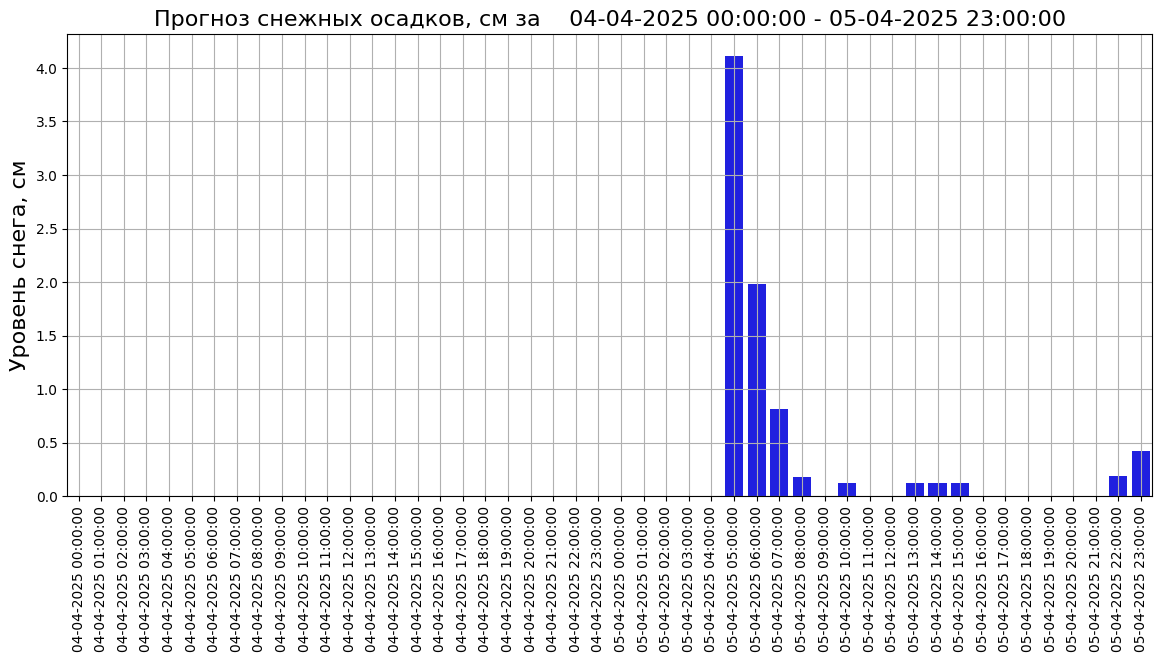

In [12]:
fig = plt.subplots(figsize = (14,6))

hist_snow = sns.barplot(
    data = forecast_df,
    x = 'dt', 
    y='snow',
    color='blue'
)

hist_snow.set_ylabel('Уровень снега, см', fontsize = 16)
hist_snow.set_xlabel('')
plt.tick_params(axis='x', labelrotation = 90)
plt.grid()

hist_snow_title_name = f'Прогноз снежных осадков, см за\
    {forecast_df.iloc[0]['dt']} - {forecast_df.iloc[47]['dt']}'

hist_snow.set_title(hist_snow_title_name, fontsize = 16)

plt.show(hist_snow)